In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [111]:
!pip install scikit-learn==0.24 --user

In [112]:
import sklearn
sklearn.__version__

'0.24.0'

In [113]:
import pandas as pd
import numpy as np

**Read all data and set hn as index**

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv')
df = df.set_index('hn')
df.head()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Data Preprocessing**

In [115]:
df.shape

(1723, 23)

In [116]:
df.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
appearance    101
stage          24
pchemo          1
Wardsize      145
finalhisto     10
nodeyiel       12
RHlvsi        366
depth         489
size          114
utmet          98
vgmargin       96
vgmet          97
pelvicme        1
pmmet          94
adnmet          7
dtype: int64

In [117]:
df_clean_column = df.drop(['appearance','Wardsize','RHlvsi','depth','nodeyiel','vgmargin','pelvicme','adnmet'],axis = 1)
df_clean_column.isnull().sum(axis=0)

age             0
parity          0
hiv             4
menopaus        1
disease         0
surgery         0
conization      5
OPDsize        17
stage          24
pchemo          1
finalhisto     10
size          114
utmet          98
vgmet          97
pmmet          94
dtype: int64

In [118]:
df_clean = df_clean_column.dropna(axis = 0)

In [119]:
df_clean.shape

(1555, 15)

In [120]:
pel_class = np.unique(df_clean['pmmet'])
pel_class

array([0., 1.])

In [121]:
pel_class = np.unique(df_clean['pmmet'])
pel_class

array([0., 1.])

In [122]:
pel_value = [sum(df_clean['pmmet']==pel_class[0]),
             sum(df_clean['pmmet']==pel_class[1])]
pel_value

[1278, 277]

In [123]:
y = df_clean['pmmet'].values
X = df_clean.drop(['pmmet'],axis = 1).values

In [124]:
np.shape(y)

(1555,)

In [125]:
np.shape(X)

(1555, 14)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Pipeline Example

In [127]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

#sm = SMOTE(random_state=1)
#X_res, y_res = sm.fit_resample(X_train, y_train)

params = {'C': [1, 2, 4, 8, 16]}
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_reduction',  PCA(n_components = 12)),
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection',SelectKBest(f_regression, k=10)),
  ('feature_fwd', SequentialFeatureSelector(LogisticRegression(random_state=0, solver='liblinear') , n_features_to_select=8)),
  ('classification',  GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=5))
])
clf.fit(X_train, y_train)

Pipeline(steps=[('feature_reduction', PCA(n_components=12)),
                ('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x7f51da243170>)),
                ('feature_fwd',
                 SequentialFeatureSelector(estimator=LogisticRegression(random_state=0,
                                                                        solver='liblinear'),
                                           n_features_to_select=8)),
                ('classification',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0,
                                                           solver='liblinear'),
                              param_grid={'C': [1, 2, 4, 8, 16]}))])

In [128]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X_train, y_train, cv=10)
print("10CV Training Accuracy : "+str(acc.mean()))

10CV Training Accuracy : 0.8272129032258064


In [129]:
yp = clf.predict(X_test)
acc =   sum(yp == y_test)/len(y_test)
print("Test Training Accuracy : "+str(acc))

Test Training Accuracy : 0.8520900321543409


In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train_pca)
X_train_norm = scaler.transform(X_train_pca)
X_test_norm = scaler.transform(X_test_pca)

In [131]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
tsne.fit(X_train)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train_tsne)
X_train_norm = scaler.transform(X_train_tsne)
X_test_norm = scaler.transform(X_test_tsne)

**Logistic Regression**

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 2, 4, 8, 16]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1}
10CV accuracy : 81.99483870967741


In [133]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 82.95819935691318


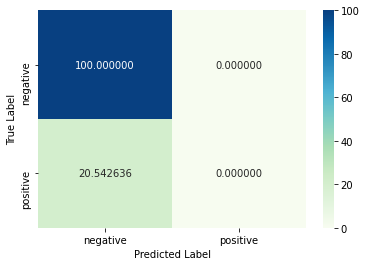

In [134]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [135]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.83      1.00      0.91       258
    positive       0.00      0.00      0.00        53

    accuracy                           0.83       311
   macro avg       0.41      0.50      0.45       311
weighted avg       0.69      0.83      0.75       311



/root/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Machine**

In [136]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1,2,4,8,16,32], # High C = Overfitting
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32] # High gamma = Overfitting
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 1, 'gamma': 0.03125}
10CV accuracy : 81.99483870967741


In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.8295819935691319

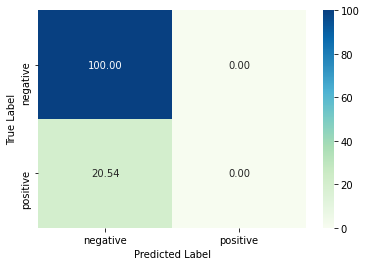

In [138]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [139]:
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.83      1.00      0.91       258
    positive       0.00      0.00      0.00        53

    accuracy                           0.83       311
   macro avg       0.41      0.50      0.45       311
weighted avg       0.69      0.83      0.75       311



/root/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200,500],
    'min_samples_leaf' : [1,2,4,8,16,32],
    'max_features' : ['sqrt',0.5,0.8],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(RandomForestClassifier(random_state=0),params, cv = 10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

**XGBoost**

In [ ]:
#!pip install xgboost  // If you dont have XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators' : [10,50,100,200],
    'max_depth' : [2, 4, 8],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5,0.8, 1],
    'colsample_bytree' : [0.5, 0.8, 1]    
}
clf = GridSearchCV(xgb.XGBClassifier(random_state=0, objective='binary:logistic',n_jobs=-1),params, cv = 10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=target_names))

**Assignment**

In [143]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_train, y_train)

params = {
    'C' : [1,2,4,8,16,32],
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32] 
}

from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0, 1))),
  ('feature_selection', SelectKBest(f_classif, k=5)),
  ('classification', GridSearchCV(SVC(random_state=0),params, cv = 10))
])
clf.fit(X_res, y_res)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection', SelectKBest(k=5)),
                ('classification',
                 GridSearchCV(cv=10, estimator=SVC(random_state=0),
                              param_grid={'C': [1, 2, 4, 8, 16, 32],
                                          'gamma': [0.03125, 0.0625, 0.125,
                                                    0.25, 0.5, 1, 2, 4, 8, 16,
                                                    32]}))])

In [144]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(clf, X_res, y_res, cv=10)
print("10CV Training Accuracy : "+str(acc.mean())) 

10CV Training Accuracy : 0.7862745098039216


In [145]:
yp = clf.predict(X_test)
acc = sum(yp == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

Test accuracy : 0.729903536977492
